# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ETH"
cryptoPair = "USDT"

trainTestSplit = 0.8

# ------------------------------------------------------------------------------------------------------

### Loading dataset price data

In [3]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ADAUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
data = pd.DataFrame(klines)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data=data[['close']]
data.head()
data = data.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,0.18292000
2021-01-01 07:59:59.999,0.17955000
2021-01-01 11:59:59.999,0.17950000
2021-01-01 15:59:59.999,0.18055000
2021-01-01 19:59:59.999,0.17432000


### Five last records of data

In [5]:
data.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,1.32900000
2021-12-31 11:59:59.999,1.36100000
2021-12-31 15:59:59.999,1.35500000
2021-12-31 19:59:59.999,1.28600000
2021-12-31 23:59:59.999,1.30800000


### Coloumns/features in data

In [6]:
data.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 2190


### Counts of missing values in each column

In [8]:
data.isnull().sum() #checking the null values columns wise 

close    0
dtype: int64

In [9]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
data['close']=data['close'].astype(float)

### Spliting date into day, month and year

In [10]:
data['date'] = data.index # taking dates in date column 
data.sort_index(ascending=True, inplace=True)
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data
data['Hour'] = data['date'].dt.hour # extracting year from data
data['Minutes'] = data['date'].dt.minute # extracting year from data

In [11]:
data.head()

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,0.18292,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,0.17955,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,0.17950,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,0.18055,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,0.17432,2021-01-01 19:59:59.999,1,1,2021,19,59


### Close price with respect to year 

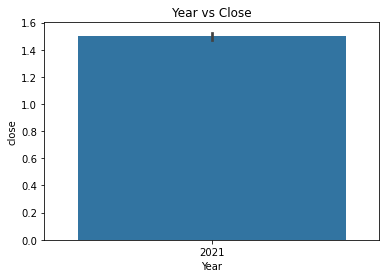

In [12]:
sns.barplot(x='Year', y='close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

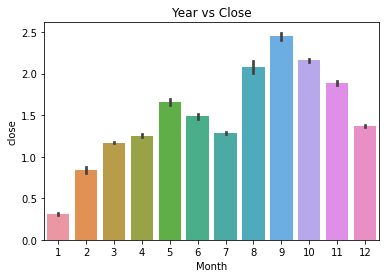

In [13]:
sns.barplot(x='Month', y='close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

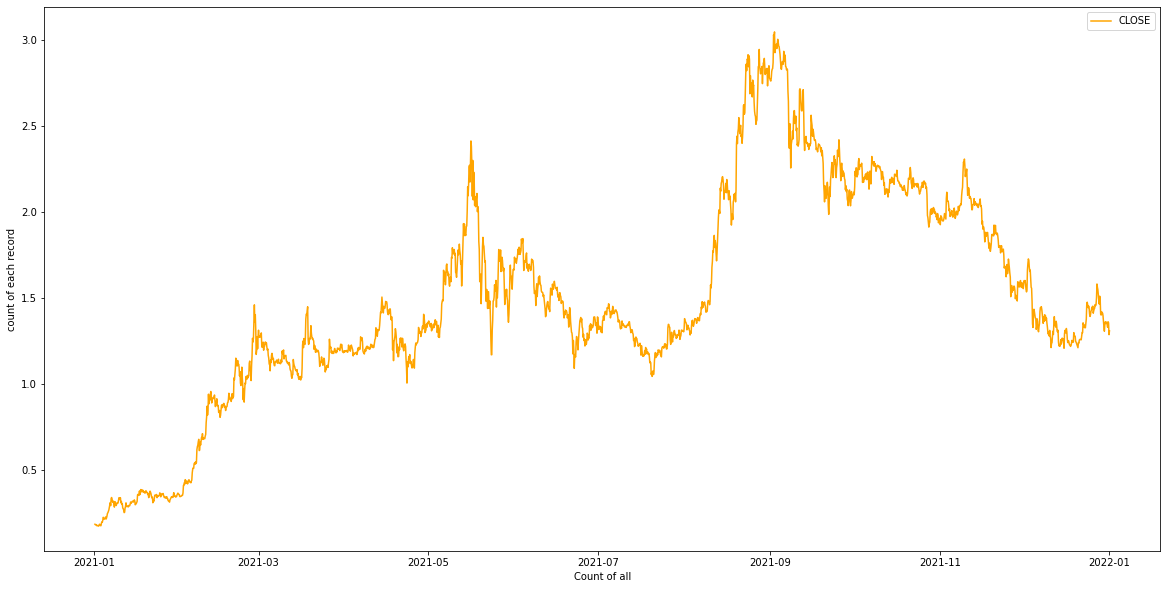

In [14]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [15]:
X=data.drop(columns=['close','date']) #dropping the 'Close','date'
X #input features 

,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,1,1,2021,19,59
...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59
2021-12-31 11:59:59.999,12,31,2021,11,59
2021-12-31 15:59:59.999,12,31,2021,15,59
2021-12-31 19:59:59.999,12,31,2021,19,59


### Taking target as output

In [16]:
y=data['close'] # output close 
y #output 

2021-01-01 03:59:59.999    0.18292
2021-01-01 07:59:59.999    0.17955
2021-01-01 11:59:59.999    0.17950
2021-01-01 15:59:59.999    0.18055
2021-01-01 19:59:59.999    0.17432
                            ...   
2021-12-31 07:59:59.999    1.32900
2021-12-31 11:59:59.999    1.36100
2021-12-31 15:59:59.999    1.35500
2021-12-31 19:59:59.999    1.28600
2021-12-31 23:59:59.999    1.30800
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [17]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 



y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

In [18]:
X_train.head()

,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,1,1,2021,19,59


In [19]:
X_test.head()

,Month,Day,Year,Hour,Minutes
2021-10-20 04:59:59.999,10,20,2021,4,59
2021-10-20 08:59:59.999,10,20,2021,8,59
2021-10-20 12:59:59.999,10,20,2021,12,59
2021-10-20 16:59:59.999,10,20,2021,16,59
2021-10-20 20:59:59.999,10,20,2021,20,59


In [20]:
y_train.head()

2021-01-01 03:59:59.999    0.18292
2021-01-01 07:59:59.999    0.17955
2021-01-01 11:59:59.999    0.17950
2021-01-01 15:59:59.999    0.18055
2021-01-01 19:59:59.999    0.17432
Name: close, dtype: float64

# --------------------------------------------------------------------------------------------------

# ARIMA Model

### Parametrs

In [21]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train_data, test_data, arima_order):
    # make predictions
    model = smapi.tsa.arima.ARIMA(train_data, order=arima_order)
    fitted = model.fit()
    preds = fitted.forecast(len(test_data), alpha=0.05)  # 95% conf
    #predSeries = pd.Series(preds.tolist(), index = test_data.index)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data, preds.tolist()))
    print(rmse)
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train_data, test_data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train_data,test_data, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
# evaluate parameters
train_data, test_data = data['close'].iloc[3:int(len(data['close'])*trainTestSplit)], data['close'].iloc[int(len(data['close'])*trainTestSplit):]
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(train_data, test_data, p_values, d_values, q_values)

0.41523840057661754
ARIMA(0, 0, 0) RMSE=0.415
0.4144570633564445
ARIMA(0, 0, 1) RMSE=0.414
0.4137862353836488
ARIMA(0, 0, 2) RMSE=0.414
0.5269699245401609
ARIMA(0, 1, 0) RMSE=0.527
0.526563830048097
ARIMA(0, 1, 1) RMSE=0.527
0.5265511440855207
ARIMA(0, 1, 2) RMSE=0.527
3.042812791329636
ARIMA(0, 2, 0) RMSE=3.043
0.7951975911975875
ARIMA(0, 2, 1) RMSE=0.795
0.7985677706700877
ARIMA(0, 2, 2) RMSE=0.799
0.24639274088130492
ARIMA(1, 0, 0) RMSE=0.246
0.22453756421460522
ARIMA(1, 0, 1) RMSE=0.225
0.25384374359338285
ARIMA(1, 0, 2) RMSE=0.254
0.5265573776440463
ARIMA(1, 1, 0) RMSE=0.527
0.526556821870524
ARIMA(1, 1, 1) RMSE=0.527
0.5265222914335796
ARIMA(1, 1, 2) RMSE=0.527
1.2063531133350733
ARIMA(1, 2, 0) RMSE=1.206
0.7987313038010945
ARIMA(1, 2, 1) RMSE=0.799
0.7981895335432256
ARIMA(1, 2, 2) RMSE=0.798
0.256230376865078
ARIMA(2, 0, 0) RMSE=0.256
0.2801671091456272
ARIMA(2, 0, 1) RMSE=0.280
0.35524845911106734
ARIMA(2, 0, 2) RMSE=0.355
0.526556332998313
ARIMA(2, 1, 0) RMSE=0.527
0.52655690

In [22]:
train_data, test_data = data['close'].iloc[3:int(len(data['close'])*trainTestSplit)], data['close'].iloc[int(len(data['close'])*trainTestSplit):]
#Modeling
# Build Model
model = smapi.tsa.arima.ARIMA(train_data, order=(best_cfg))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1749
Model:                 ARIMA(2, 2, 0)   Log Likelihood                2746.137
Date:                Tue, 10 May 2022   AIC                          -5486.274
Time:                        14:03:53   BIC                          -5469.877
Sample:                             0   HQIC                         -5480.213
                               - 1749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7141      0.014    -52.052      0.000      -0.741      -0.687
ar.L2         -0.3507      0.014    -24.320      0.000      -0.379      -0.322
sigma2         0.0025   4.75e-05     53.067      0.0

In [23]:
preds = fitted.forecast(len(test_data), alpha=0.05)  # 95% conf
predSeries = pd.Series(preds.tolist(), index = test_data.index)

In [24]:
predSeries

2021-10-20 04:59:59.999    2.103250
2021-10-20 08:59:59.999    2.101097
2021-10-20 12:59:59.999    2.101535
2021-10-20 16:59:59.999    2.098510
2021-10-20 20:59:59.999    2.097050
                             ...   
2021-12-31 07:59:59.999    1.376907
2021-12-31 11:59:59.999    1.375228
2021-12-31 15:59:59.999    1.373549
2021-12-31 19:59:59.999    1.371870
2021-12-31 23:59:59.999    1.370191
Length: 438, dtype: float64

# Evaluation Measures on Test data

# MSE

In [25]:
y_pred_test=preds.tolist() # tetsing trained model on test data
test_mse1=mean_squared_error(test_data.tolist(),y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  0.0277


# MAE

In [26]:
test_MAE1=mean_absolute_error(test_data.tolist(),y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  0.13289


# RMSE

In [27]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  0.16643


# MAPE

In [28]:
test_mape1=mean_absolute_percentage_error(test_data.tolist(),y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.08653


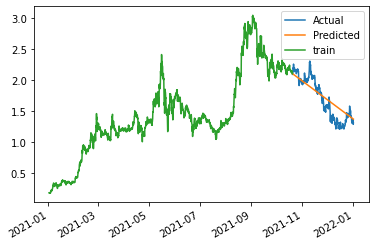

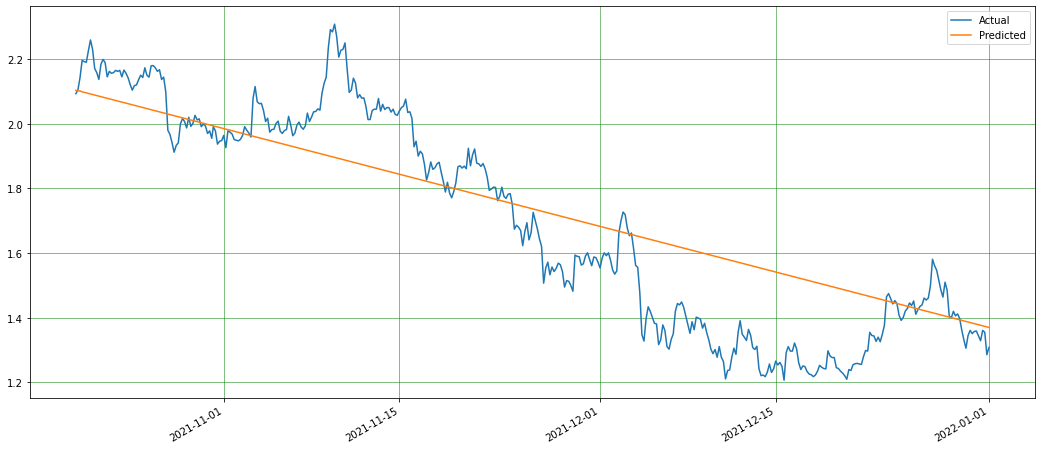

In [29]:
df = pd.DataFrame({'Actual': test_data, 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

### Parametrs

In [30]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.545
ARIMA(0, 0, 1) RMSE=0.549
ARIMA(0, 0, 2) RMSE=0.552
ARIMA(0, 1, 0) RMSE=0.797
ARIMA(0, 1, 1) RMSE=0.796
ARIMA(0, 1, 2) RMSE=0.796
ARIMA(0, 2, 0) RMSE=3.375
ARIMA(0, 2, 1) RMSE=0.448
ARIMA(0, 2, 2) RMSE=0.396
ARIMA(1, 0, 0) RMSE=0.371
ARIMA(1, 0, 1) RMSE=0.475
ARIMA(1, 0, 2) RMSE=0.330
ARIMA(1, 1, 0) RMSE=0.796
ARIMA(1, 1, 1) RMSE=0.791
ARIMA(1, 1, 2) RMSE=0.795
ARIMA(1, 2, 0) RMSE=1.635
ARIMA(1, 2, 1) RMSE=0.443
ARIMA(1, 2, 2) RMSE=0.495
ARIMA(2, 0, 0) RMSE=0.439
ARIMA(2, 0, 1) RMSE=0.651
ARIMA(2, 0, 2) RMSE=0.509
ARIMA(2, 1, 0) RMSE=0.793
ARIMA(2, 1, 1) RMSE=0.791
ARIMA(2, 1, 2) RMSE=0.788
ARIMA(2, 2, 0) RMSE=0.562
ARIMA(2, 2, 1) RMSE=0.477
ARIMA(2, 2, 2) RMSE=0.491
ARIMA(4, 0, 0) RMSE=0.443
ARIMA(4, 0, 1) RMSE=0.544
ARIMA(4, 0, 2) RMSE=0.767
ARIMA(4, 1, 0) RMSE=0.796
ARIMA(4, 1, 1) RMSE=0.789
ARIMA(4, 1, 2) RMSE=0.791
ARIMA(4, 2, 0) RMSE=0.796
ARIMA(4, 2, 1) RMSE=0.354
ARIMA(4, 2, 2) RMSE=0.493
ARIMA(6, 0, 0) RMSE=0.293
ARIMA(6, 0, 1) RMSE=0.559
ARIMA(6, 0, 

In [31]:
Xtest = data
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [32]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

### Best Parameter selected

# Evaluation Measures on Test data

# MSE

In [33]:
#y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse2=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  0.02946


# MAE

In [34]:
test_MAE2=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  0.13491


# RMSE

In [35]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  0.17164


# MAPE

In [36]:
test_mape2=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.08954


# --------------------------------------------------------------------------------------------------

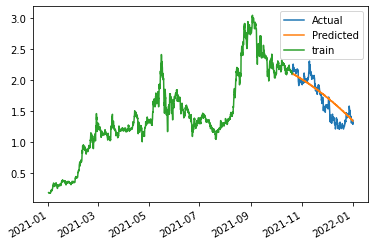

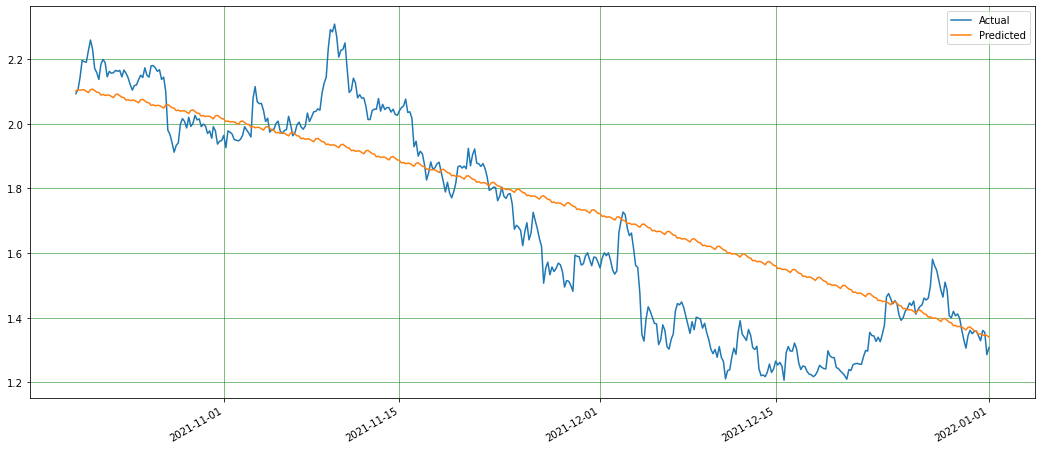

In [37]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [38]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [39]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 133.90424275
Iteration 2, loss = 60.80102830
Iteration 3, loss = 29.92335468
Iteration 4, loss = 17.46516470
Iteration 5, loss = 10.90122596
Iteration 6, loss = 6.88089804
Iteration 7, loss = 4.27204366
Iteration 8, loss = 2.99284041
Iteration 9, loss = 2.15392093
Iteration 10, loss = 1.42459684
Iteration 11, loss = 0.79184073
Iteration 12, loss = 0.52832320
Iteration 13, loss = 0.36485078
Iteration 14, loss = 0.28320363
Iteration 15, loss = 0.25591331
Iteration 16, loss = 0.21971099
Iteration 17, loss = 0.20057092
Iteration 18, loss = 0.18839197
Iteration 19, loss = 0.19813963
Iteration 20, loss = 0.17652272
Iteration 21, loss = 0.16992803
Iteration 22, loss = 0.16851712
Iteration 23, loss = 0.16741715
Iteration 24, loss = 0.17010192
Iteration 25, loss = 0.16031994
Iteration 26, loss = 0.15280110
Iteration 27, loss = 0.17441420
Iteration 28, loss = 0.16665378
Iteration 29, loss = 0.15886943
Iteration 30, loss = 0.14725589
Iteration 31, loss = 0.14074026
Iteration 3

Iteration 9, loss = 152.40403636
Iteration 10, loss = 129.42342023
Iteration 11, loss = 8.73573608
Iteration 12, loss = 48.65732526
Iteration 13, loss = 17.37862833
Iteration 14, loss = 7.11840869
Iteration 15, loss = 12.28402185
Iteration 16, loss = 1.68380730
Iteration 17, loss = 4.64746971
Iteration 18, loss = 1.76654411
Iteration 19, loss = 1.68143451
Iteration 20, loss = 1.48905596
Iteration 21, loss = 0.93845238
Iteration 22, loss = 1.11022725
Iteration 23, loss = 0.79862240
Iteration 24, loss = 0.89980846
Iteration 25, loss = 0.77601450
Iteration 26, loss = 0.79540538
Iteration 27, loss = 0.73893748
Iteration 28, loss = 0.72027520
Iteration 29, loss = 0.69227658
Iteration 30, loss = 0.67065714
Iteration 31, loss = 0.64956827
Iteration 32, loss = 0.63234619
Iteration 33, loss = 0.62574727
Iteration 34, loss = 0.59368663
Iteration 35, loss = 0.55483864
Iteration 36, loss = 0.53652338
Iteration 37, loss = 0.53955533
Iteration 38, loss = 0.51605063
Iteration 39, loss = 0.50803107
It

Iteration 56, loss = 0.06285913
Iteration 57, loss = 0.06308676
Iteration 58, loss = 0.05366680
Iteration 59, loss = 0.03456354
Iteration 60, loss = 0.03242713
Iteration 61, loss = 0.02788283
Iteration 62, loss = 0.03680644
Iteration 63, loss = 0.04237397
Iteration 64, loss = 0.04632399
Iteration 65, loss = 0.03204606
Iteration 66, loss = 0.02578763
Iteration 67, loss = 0.02421569
Iteration 68, loss = 0.03008713
Iteration 69, loss = 0.03585418
Iteration 70, loss = 0.04253073
Iteration 71, loss = 0.03294393
Iteration 72, loss = 0.02182249
Iteration 73, loss = 0.02530342
Iteration 74, loss = 0.03948860
Iteration 75, loss = 0.10499365
Iteration 76, loss = 0.07089911
Iteration 77, loss = 0.05192494
Iteration 78, loss = 0.03632951
Iteration 79, loss = 0.04732884
Iteration 80, loss = 0.03102623
Iteration 81, loss = 0.02263549
Iteration 82, loss = 0.02765837
Iteration 83, loss = 0.02525822
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 38, loss = 0.09915441
Iteration 39, loss = 0.09624429
Iteration 40, loss = 0.10891568
Iteration 41, loss = 0.11365002
Iteration 42, loss = 0.09134989
Iteration 43, loss = 0.08672300
Iteration 44, loss = 0.08448757
Iteration 45, loss = 0.08439226
Iteration 46, loss = 0.08322010
Iteration 47, loss = 0.08658980
Iteration 48, loss = 0.08224541
Iteration 49, loss = 0.09730062
Iteration 50, loss = 0.07393198
Iteration 51, loss = 0.07273766
Iteration 52, loss = 0.07324454
Iteration 53, loss = 0.06891322
Iteration 54, loss = 0.06540016
Iteration 55, loss = 0.07235662
Iteration 56, loss = 0.06990775
Iteration 57, loss = 0.06084993
Iteration 58, loss = 0.06189448
Iteration 59, loss = 0.05764462
Iteration 60, loss = 0.06166652
Iteration 61, loss = 0.05786525
Iteration 62, loss = 0.05532441
Iteration 63, loss = 0.05215592
Iteration 64, loss = 0.05001147
Iteration 65, loss = 0.05156938
Iteration 66, loss = 0.04658809
Iteration 67, loss = 0.04440618
Iteration 68, loss = 0.05129293
Iteratio

Iteration 6, loss = 89.07299604
Iteration 7, loss = 181.03961946
Iteration 8, loss = 36.77128766
Iteration 9, loss = 44.50996462
Iteration 10, loss = 35.63009382
Iteration 11, loss = 8.13078110
Iteration 12, loss = 11.44969484
Iteration 13, loss = 8.17427907
Iteration 14, loss = 3.32053649
Iteration 15, loss = 1.37606535
Iteration 16, loss = 1.21074080
Iteration 17, loss = 1.16609577
Iteration 18, loss = 0.81535441
Iteration 19, loss = 0.67674051
Iteration 20, loss = 0.63578947
Iteration 21, loss = 0.57268583
Iteration 22, loss = 0.55384286
Iteration 23, loss = 0.50650397
Iteration 24, loss = 0.45453127
Iteration 25, loss = 0.43188481
Iteration 26, loss = 0.38585969
Iteration 27, loss = 0.34905014
Iteration 28, loss = 0.31402142
Iteration 29, loss = 0.29553404
Iteration 30, loss = 0.24429908
Iteration 31, loss = 0.23590045
Iteration 32, loss = 0.20227887
Iteration 33, loss = 0.21362520
Iteration 34, loss = 0.18498204
Iteration 35, loss = 0.16228651
Iteration 36, loss = 0.16716558
Itera

Iteration 34, loss = 0.10354221
Iteration 35, loss = 0.10160039
Iteration 36, loss = 0.09841250
Iteration 37, loss = 0.09904271
Iteration 38, loss = 0.12311069
Iteration 39, loss = 0.12588911
Iteration 40, loss = 0.10697304
Iteration 41, loss = 0.10022113
Iteration 42, loss = 0.09714927
Iteration 43, loss = 0.10441200
Iteration 44, loss = 0.09961294
Iteration 45, loss = 0.09734443
Iteration 46, loss = 0.09482380
Iteration 47, loss = 0.10824632
Iteration 48, loss = 0.09984413
Iteration 49, loss = 0.10191992
Iteration 50, loss = 0.10596312
Iteration 51, loss = 0.10355500
Iteration 52, loss = 0.10397563
Iteration 53, loss = 0.09760964
Iteration 54, loss = 0.09888245
Iteration 55, loss = 0.12091395
Iteration 56, loss = 0.10664953
Iteration 57, loss = 0.11559729
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4845.65095934
Iteration 2, loss = 1826.52205277
Iteration 3, loss = 1065.31905924
Iteration 4, loss = 570.00549571
Iterati

Iteration 20, loss = 0.36618521
Iteration 21, loss = 0.32789970
Iteration 22, loss = 0.29701901
Iteration 23, loss = 0.29550207
Iteration 24, loss = 0.28621340
Iteration 25, loss = 0.23735034
Iteration 26, loss = 0.21800161
Iteration 27, loss = 0.18967207
Iteration 28, loss = 0.16844017
Iteration 29, loss = 0.15521501
Iteration 30, loss = 0.14295458
Iteration 31, loss = 0.13975616
Iteration 32, loss = 0.11176116
Iteration 33, loss = 0.10583935
Iteration 34, loss = 0.09845983
Iteration 35, loss = 0.08582850
Iteration 36, loss = 0.09030751
Iteration 37, loss = 0.08056599
Iteration 38, loss = 0.08001142
Iteration 39, loss = 0.07729383
Iteration 40, loss = 0.07987215
Iteration 41, loss = 0.07586183
Iteration 42, loss = 0.08313247
Iteration 43, loss = 0.08734769
Iteration 44, loss = 0.07202183
Iteration 45, loss = 0.07036878
Iteration 46, loss = 0.06716055
Iteration 47, loss = 0.09295104
Iteration 48, loss = 0.09059133
Iteration 49, loss = 0.07380937
Iteration 50, loss = 0.05805762
Iteratio

Iteration 152, loss = 0.07162768
Iteration 153, loss = 0.07316190
Iteration 154, loss = 0.08132428
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3000.81847053
Iteration 2, loss = 650.36093542
Iteration 3, loss = 272.48377652
Iteration 4, loss = 118.39836577
Iteration 5, loss = 54.39823111
Iteration 6, loss = 23.47885272
Iteration 7, loss = 7.32518761
Iteration 8, loss = 2.67519734
Iteration 9, loss = 1.73149991
Iteration 10, loss = 0.63839197
Iteration 11, loss = 0.39560114
Iteration 12, loss = 0.25309340
Iteration 13, loss = 0.20680214
Iteration 14, loss = 0.19580389
Iteration 15, loss = 0.18665474
Iteration 16, loss = 0.18053560
Iteration 17, loss = 0.17389272
Iteration 18, loss = 0.16769328
Iteration 19, loss = 0.16270687
Iteration 20, loss = 0.15735261
Iteration 21, loss = 0.15511570
Iteration 22, loss = 0.15542062
Iteration 23, loss = 0.14132367
Iteration 24, loss = 0.13296162
Iteration 25, loss = 0.13606857
Iteration

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [40]:
Model_R.best_params_

{'momentum': 0.7,
 'max_iter': 400,
 'learning_rate_init': 0.002,
 'hidden_layer_sizes': (200,)}

# Evaluation Measures on Test data

# MSE

In [41]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  1.15574


# MAE

In [42]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  0.97241


# RMSE

In [43]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  1.07505


# MAPE

In [44]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.64953


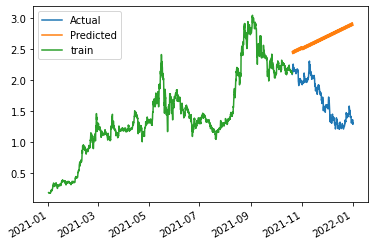

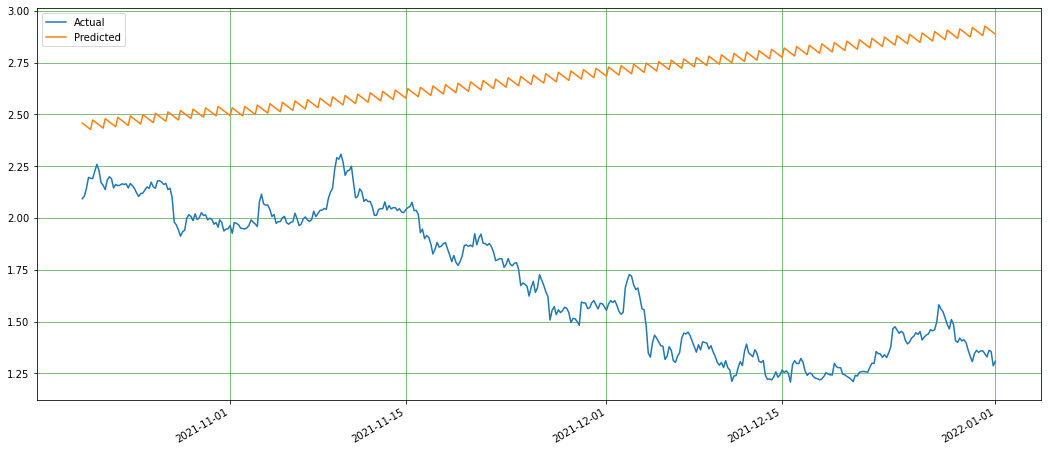

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [46]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [47]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 50.6 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [48]:
Model_R.best_params_

{'tol': 0.003, 'max_iter': 300, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [49]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  1.14344


# MAE

In [50]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  0.9636


# RMSE

In [51]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  1.06932


# MAPE

In [52]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.64477


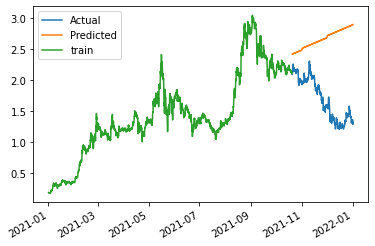

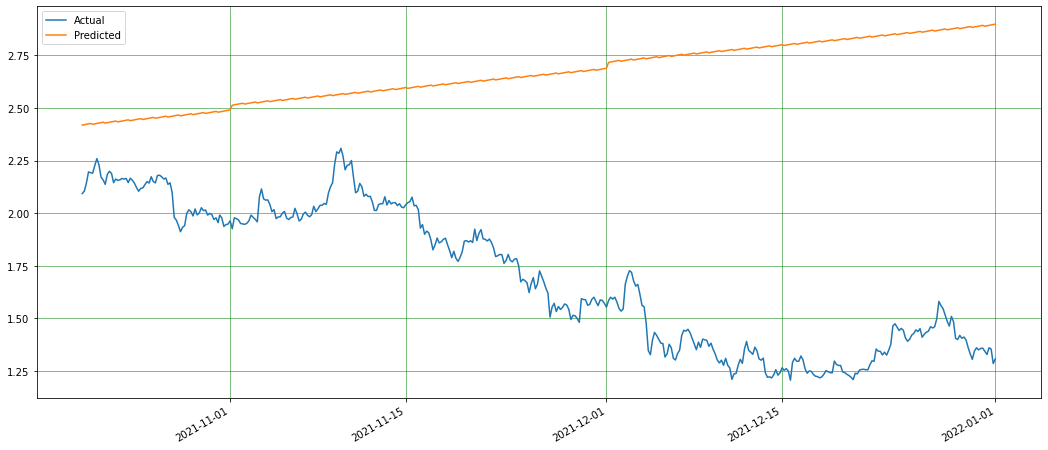

In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [54]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [55]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 1.99 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [56]:
Model_R.best_params_

{'random_state': 10, 'min_samples_leaf': 50, 'max_depth': 50}

# Evaluation Measures on Test data

# MSE

In [57]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  0.4532


# MAE

In [58]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  0.58591


# RMSE

In [59]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  0.6732


# MAPE

In [60]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.39739


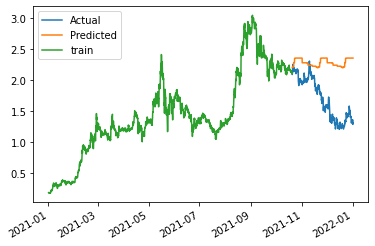

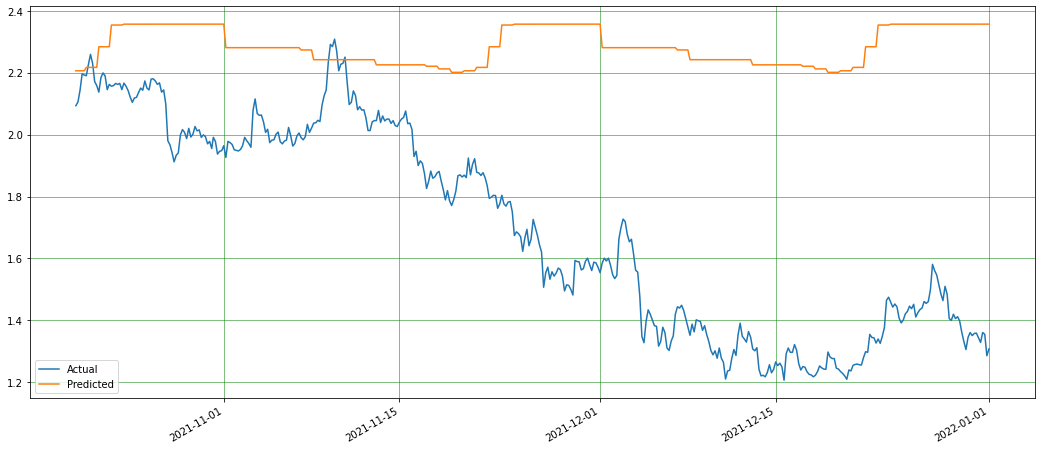

In [61]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [62]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [63]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 5.47 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [64]:
Model_R.best_params_

{'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1, 'base_score': 0.6}

# Evaluation Measures on Test data

# MSE

In [65]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  0.34493


# MAE

In [66]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  0.48938


# RMSE

In [67]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  0.58731


# MAPE

In [68]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.33748


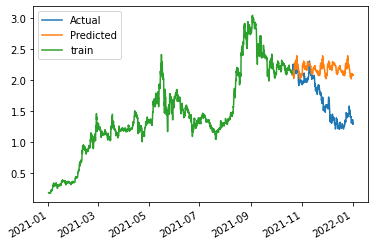

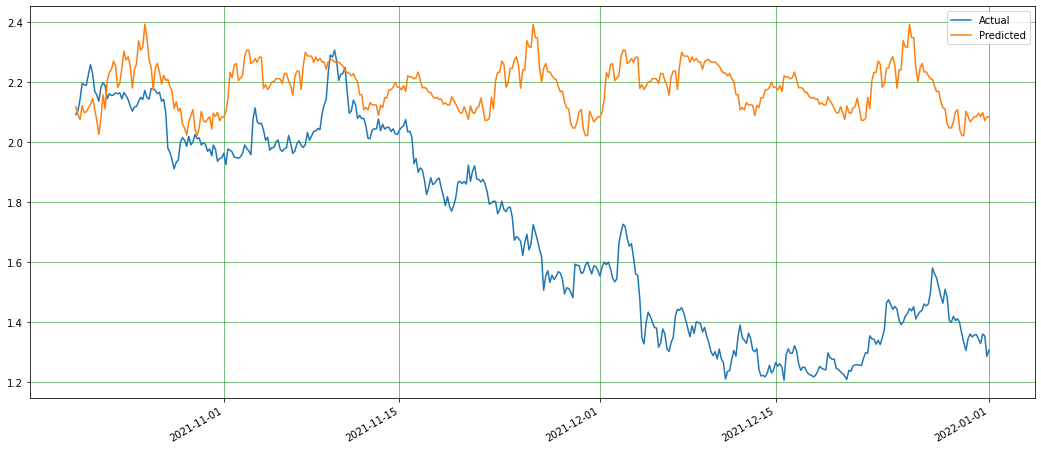

In [69]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [70]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MSE score |
+-------------------------+-----------+
|     ARIMA Algorithm     |   0.028   |
|    SARIMAX Algorithm    |   0.029   |
|      MLP Algorithm      |   1.156   |
|     Ridge Algorithm     |   1.143   |
| Random Forest Algorithm |   0.453   |
|      XGB Algorithm      |   0.345   |
+-------------------------+-----------+




# Comparison of all algorithms Results on MAE score

In [71]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["ARIMA Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|     ARIMA Algorithm     |   0.133   |
|    SARIMAX Algorithm    |   0.135   |
|      MLP Algorithm      |   0.972   |
|     Ridge Algorithm     |   0.964   |
| Random Forest Algorithm |   0.586   |
|      XGB Algorithm      |   0.489   |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [72]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|     ARIMA Algorithm     |   0.166    |
|    SARIMAX Algorithm    |   0.172    |
|      MLP Algorithm      |   1.075    |
|     Ridge Algorithm     |   1.069    |
| Random Forest Algorithm |   0.673    |
|      XGB Algorithm      |   0.587    |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [73]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|     ARIMA Algorithm     |   0.087    |
|    SARIMAX Algorithm    |    0.09    |
|      MLP Algorithm      |    0.65    |
|     Ridge Algorithm     |   0.645    |
| Random Forest Algorithm |   0.397    |
|      XGB Algorithm      |   0.337    |
+-------------------------+------------+


